<a href="https://colab.research.google.com/github/leobii/Image-Processing/blob/main/Canny_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canny Edge Detector
$p.30 \sim p.53$

1. Gaussian filter
2. Find the intensity gradient of the image

  a. Apply a pair of convolution masks

  ![](https://i.imgur.com/EiYaObX.png)

  b. Find the gradient strength and direction with:

  ![](https://i.imgur.com/U5FEiKe.png)

3. Non-maximum Suppression
4. Thresholding edges
5. Hysteresis: The final step. Canny does use two thresholds (upper and lower):
>If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.
If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
Canny recommended a upper:lower ratio between 2:1 and 3:1.

[Canny Edge Detector](https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/image')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
#from scipy import signal
#from scipy import misc

## Step 1. Gaussian filter

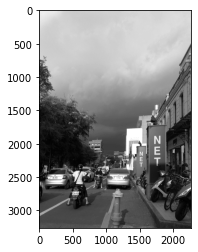

In [ ]:
# 讀取灰階圖片
img_org = cv2.imread("HW1_image.jpeg",0)
KernalSize = 3
def Gaussian_Filter(KernalSize,image):
    # ----- to do  -------#

    """
    Creat 3*3 Gassian Kernel
    """
    # 3*3 Gassian filter
    x, y = np.mgrid[-1:KernalSize-1, -1:KernalSize-1]
    gaussian_kernel = np.exp(-(x**2+y**2))

    #Normalization
    gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()

    """
    Convolve 3*3 Gassian Kernel with Image
    """
    resx = cv2.filter2D(image, -1, kernel=gaussian_kernel)
    #resx = signal.convolve2d(image, gaussian_kernel, boundary='symm', mode='same') #卷積
    return resx

img = Gaussian_Filter(KernalSize,img_org)
plt.imshow(img, cmap='gray')
plt.show()

## Step 2. Filter image with derivative of Gaussian
![](https://i.imgur.com/G4e6Z4n.png)

In [ ]:
def sobel(img, filtering_type):
    h, w = img.shape

    horizontal = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]  #----- to do ---------------#
    vertical = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]  #----- to do ---------------#
    Gx = np.zeros((h - 2, w - 2)) 
    Gy = np.zeros((h - 2, w - 2))

    for img_region, i, j in iterate_regions(img, 3):
        if filtering_type == 'dx':
            Gx[i, j] += np.sum(img_region * horizontal)  # ----- to do -------------- #
        elif filtering_type == 'dy':
            Gy[i, j] += np.sum(img_region * vertical)  # ----- to do -------------- #
        elif filtering_type == 'magnitude':
            Gx[i, j] += np.sum(img_region * horizontal)  # ----- to do -------------- #
            Gy[i, j] += np.sum(img_region * vertical)  # ----- to do -------------- #

    gradient = np.sqrt(np.square(Gx) + np.square(Gy))  # ----- to do -------------- 
    gradient = np.pad(gradient, (1, 1), 'constant')
    angle = np.arctan(Gy / Gx)  # ----- to do -------------- #
    angle = np.pad(angle, (1, 1), 'constant')

    output = np.clip(gradient,0,255)
    angle += math.pi * np.int32(angle < 0)
    return output, angle

## iterator 
def iterate_regions(img, kernel_size):
    h, w = img.shape
    for i in range(h - kernel_size + 1):
        for j in range(w - kernel_size + 1):
            img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
            yield img_region, i, j


In [ ]:
sobel_y,_ = sobel(img, 'dy')
sobel_x,_ = sobel(img, 'dx')
sobel_m,_ = sobel(img, 'magnitude')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


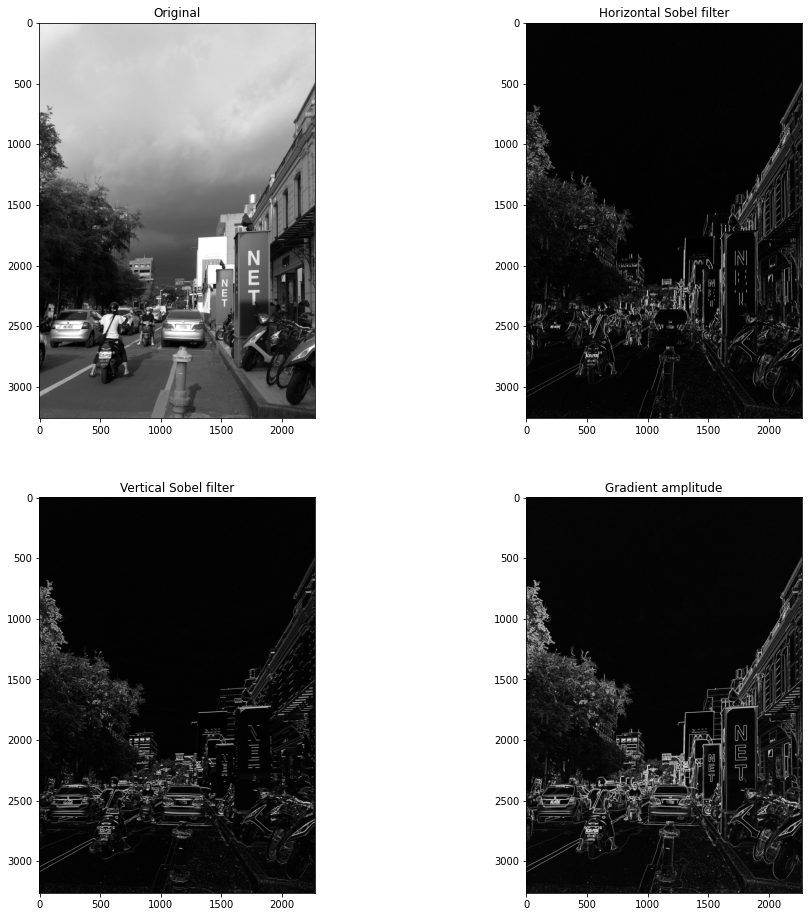

In [ ]:
# ---- to do ----- #
"""
Plot four images
"""
plt.figure(num='Sobel Filter',figsize=(16,16))     #創建一個名為Sobel Filter的窗口,並設置其大小 

plt.subplot(2,2,1)       #將窗口分為兩行兩列共四的子圖，則可顯示四幅圖片。此為第一行第一列的圖
plt.title('Original')       #第一幅圖片標題
plt.imshow(img, cmap='gray')       #繪製第一幅圖片

plt.subplot(2,2,2)     #第二個子圖(第二行第一列的圖)
plt.title('Horizontal Sobel filter')     #第二幅圖片標題
plt.imshow(sobel_x, cmap='gray')     #繪製第二幅圖片

plt.subplot(2,2,3)     #第三個子圖(第一行第二列的圖)
plt.title('Vertical Sobel filter')     #第三幅圖片標題
plt.imshow(sobel_y, cmap='gray')     #繪製第三幅圖片

plt.subplot(2,2,4)     #第四個子圖(第二行第二列的圖)
plt.title('Gradient amplitude')     #第四幅圖片標題
plt.imshow(sobel_m, cmap='gray')     #繪製第四幅圖片


plt.show()   #顯示窗口

![](https://i.imgur.com/iuck4AQ.png)

## Step 3. Non-maximum Suppression

Non maximum suppression without interpolation requires us to divide the 3x3 grid of pixels into 8 sections. Ie. if the gradient direction falls in between the angle -22.5 and 22.5, then we use the pixels that fall between this angle (r and q) as the value to compare with pixel p, see image below.

![](https://i.imgur.com/55DLrWn.png)

In [ ]:
def non_maximum_suppression(gradient,angle):
    gradient_copy = gradient.copy()
    height,width = gradient.shape
    output = np.zeros(gradient.shape)
    #print(gradient.shape) 
    #(4032, 3024)
    for j in range(1, width-1):
        for i in range(1, height-1):
            # ------------ to do ----------- #
            #0~22.5度，157.5~180度 為 0 度區間
            if((angle[i,j] >= -22.5 and angle[i,j] <= 22.5) or (angle[i,j] <= 180-22.5 and angle[i,j] >= 180+22.5)):
                if((gradient[i,j] > gradient[i,j+1]) and (gradient[i,j] > gradient[i,j-1])):
                    output[i,j] = gradient[i,j]
                else:
                    output[i,j] = 0

            #22.5~67.5度 為 45度區間
            if((angle[i,j] >= 22.5 and angle[i,j] <= 67.5) or (angle[i,j] <= 180+22.5 and angle[i,j] >= 180+67.5)):
                if((gradient[i,j] > gradient[i+1,j+1]) and (gradient[i,j] > gradient[i-1,j-1])):
                    output[i,j] = gradient[i,j]
                else:
                    output[i,j] = 0           
            #67.5~112.5度 為 90度區間
            if((angle[i,j] >= 67.5 and angle[i,j] <= 112.5) or (angle[i,j] <= 180+67.5 and angle[i,j] >= 180+112.5)):
                if((gradient[i,j] > gradient[i+1,j]) and (gradient[i,j] > gradient[i-1,j])):
                    output[i,j] = gradient[i,j]
                else:
                    output[i,j] = 0
            #112.5~157.5度 為 135度區間
            if((angle[i,j] >= 112.5 and angle[i,j] <= 157.5) or (angle[i,j] <= 180+112.5 and angle[i,j] >= 180+157.5)):
                if((gradient[i,j] > gradient[i+1,j-1]) and (gradient[i,j] >gradient[i-1,j+1])):
                    output[i,j] = gradient[i,j]
                else:
                    output[i,j] = 0
    return output

gradient,angle = sobel(img, 'magnitude')
After_non_maximum_suppression = non_maximum_suppression(gradient,angle)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


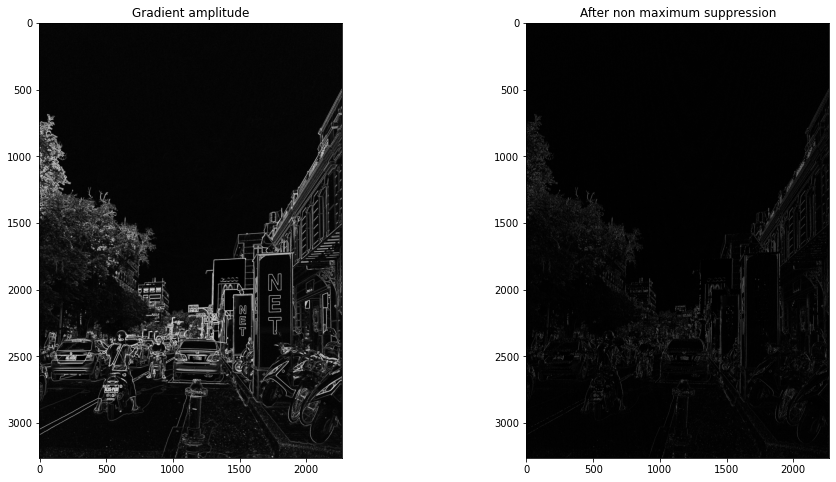

In [ ]:
# ----------- to do  plot ---------- #
plt.figure(num='Non-maximum Suppression',figsize=(16,8))  #創建一個名為Non-maximum Suppression的窗口,並設置其大小 

plt.subplot(1,2,1)     #將窗口分為兩行一列共兩個子圖。此為第一個子圖
plt.title('Gradient amplitude')   #第一幅圖片標題
plt.imshow(sobel_m, cmap='gray')      #繪製第一幅圖片

plt.subplot(1,2,2)     #第二個子圖
plt.title('After non maximum suppression')   #第二幅圖片標題
plt.imshow(After_non_maximum_suppression, cmap='gray')      #繪製第二幅圖片

plt.show()

![](https://i.imgur.com/YHCIcql.png)


## Step 4. Thresholding edges

In [ ]:
def seperate(img, minimum = 20, maximum = 60):    
    #----------------- to do  ------------------------- #
    height,width = img.shape

    #avg = np.sum(img) / (height * width)
    #print(avg)

    output = np.zeros(img.shape)
    for j in range(1, width-1):
        for i in range(1, height-1):
            if(img[i,j] < minimum):
                output[i,j] = 0
            elif(img[i,j] > maximum):
                output[i,j] = 1
    return output

thresholding = seperate(After_non_maximum_suppression, minimum = 20, maximum = 60)

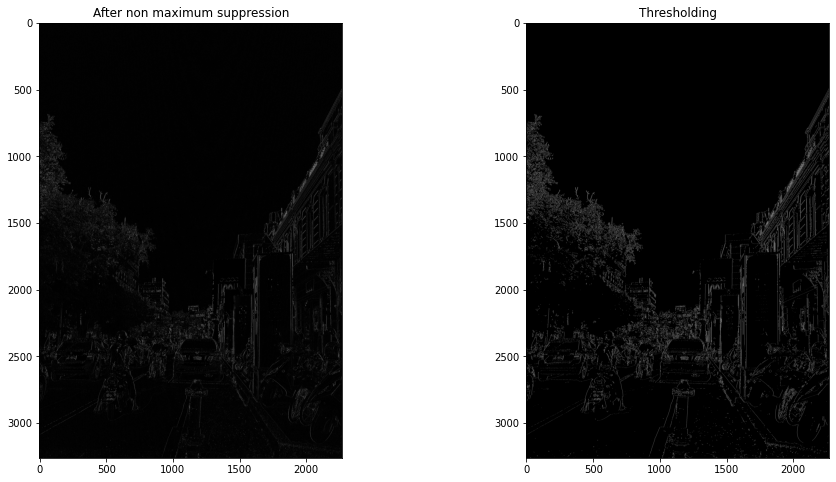

In [ ]:
#---------------- to do ---------------------#
plt.figure(num='Thresholding',figsize=(16,8))  #創建一個名為Thresholding的窗口,並設置其大小 

plt.subplot(1,2,1)     #將窗口分為兩行一列共兩個子圖。此為第一個子圖
plt.title('After non maximum suppression')   #第一幅圖片標題
plt.imshow(After_non_maximum_suppression, cmap='gray')      #繪製第一幅圖片

plt.subplot(1,2,2)     #第二個子圖
plt.title('Thresholding')   #第二幅圖片標題
plt.imshow(thresholding, cmap='gray')      #繪製第二幅圖片

plt.show()

![](https://i.imgur.com/cYbJayE.png)

## Step 5. Hysteresis
![](https://i.imgur.com/GEu9stb.png)

In [ ]:
def connect(img):
    # ------------ to do  ------------- #
    height,width = img.shape
    output = np.zeros(img.shape)
    max_amount = np.sum(img == 1)
    x = 0
    # The while loop is used so that the loop will keep executing till the number of strong edges
    # do not change, i.e all weak edges connected to strong edges have been found
    while(max_amount != x):
        max_amount = x
        for j in range(1, width-1):
            for i in range(1, height-1):
                if((img[i-1,j-1] == 1) or (img[i-1,j] == 1) or \
                  (img[i-1,j+1] == 1) or (img[i,j-1] == 1) or \
                  (img[i,j+1] == 1) or (img[i+1,j-1] == 1) or \
                  (img[i+1,j] == 1) or (img[i+1,j+1] == 1)):
                      output[i,j] = 1
                else:
                      output[i,j] = 0
        x = np.sum(output == 1)       #calculate the number of the pixels that equal to 1
    
    return output
dst_img = connect(thresholding)

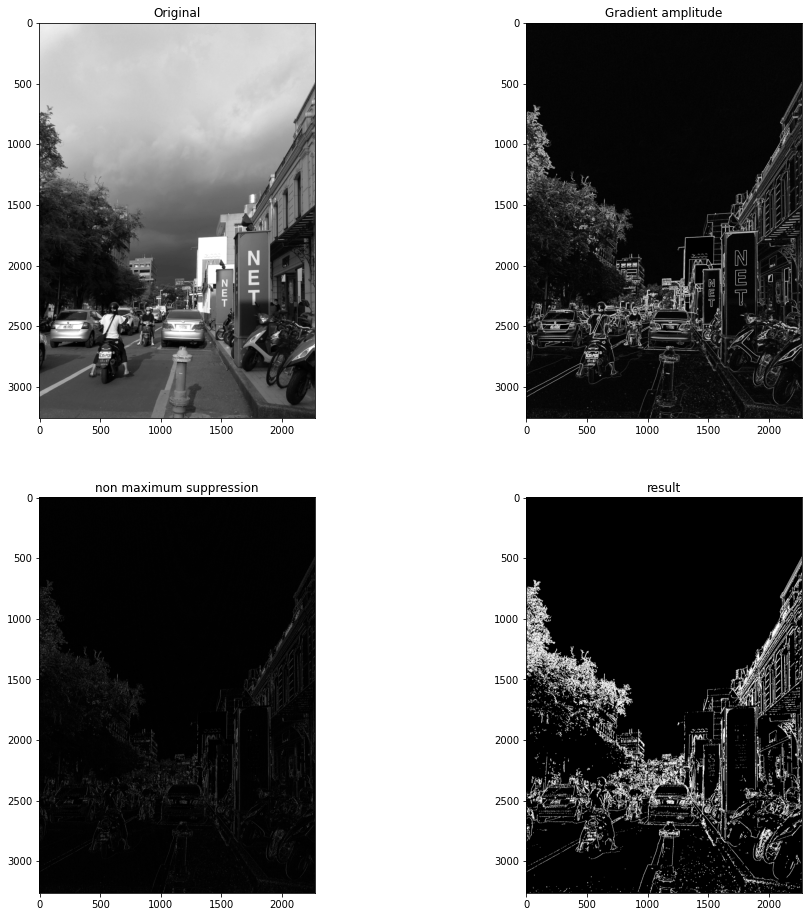

In [ ]:
#----------- to do ----------------#
plt.figure(num='Sobel Filter',figsize=(16,16))     #創建一個名為Sobel Filter的窗口,並設置其大小 

plt.subplot(2,2,1)       #將窗口分為兩行兩列共四的子圖，則可顯示四幅圖片。此為第一行第一列的圖
plt.title('Original')       #第一幅圖片標題
plt.imshow(img, cmap='gray')       #繪製第一幅圖片

plt.subplot(2,2,2)     #第二個子圖(第二行第一列的圖)
plt.title('Gradient amplitude')     #第二幅圖片標題
plt.imshow(sobel_m, cmap='gray')     #繪製第二幅圖片

plt.subplot(2,2,3)     #第三個子圖(第一行第二列的圖)
plt.title('non maximum suppression')     #第三幅圖片標題
plt.imshow(After_non_maximum_suppression, cmap='gray')     #繪製第三幅圖片

plt.subplot(2,2,4)     #第四個子圖(第二行第二列的圖)
plt.title('result')     #第四幅圖片標題
plt.imshow(dst_img, cmap='gray')     #繪製第四幅圖片


plt.show()   #顯示窗口

![](https://i.imgur.com/G0q98le.png)

# Canny Edge OpenCV 套件


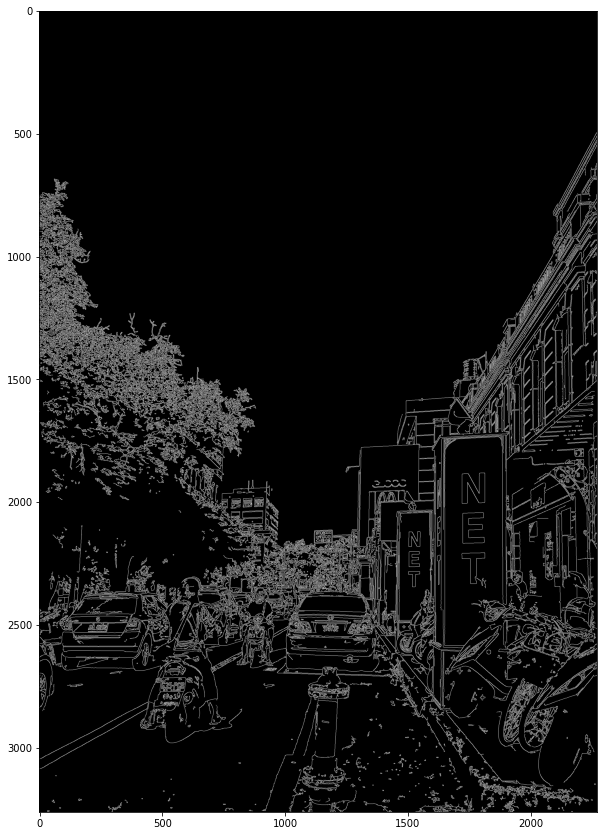

In [ ]:
low_threshold = 15
high_threshold = 90
kernel_size = 3
#這邊較低的threshold用於檢測圖像中明顯的邊緣，較高的threshold則將間斷的邊緣連接起來。
plt.figure(figsize=(10,18))
img2 = cv2.imread("HW1_image.jpeg",0)
gray_blur = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray_blur, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')
plt.show()